In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Підвищимо розмір графіків за замовчуванням
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = 7, 5
# plt.rcParams['axes.grid'] = True


In [31]:
# confusion matrix
INPUT_MATRIX = np.array([
    [133, 12, 96, 253, 187, 169, 108],
    [13, 0, 12, 31, 22, 20, 13],
    [131, 9, 123, 259, 212, 166, 124],
    [223, 18, 209, 450, 349, 324, 201],
    [177, 10, 160, 281, 253, 229, 123],
    [194, 12, 146, 287, 235, 220, 153],
    [112, 11, 101, 211, 169, 115, 112]
])

# define emotion classes
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

MODEL_NAME = 'Модель_1'

In [32]:
# calculate accuracy
accuracy = np.trace(INPUT_MATRIX) / np.sum(INPUT_MATRIX)
print(f"Overall Accuracy: {accuracy}")

# flatten the matrix for sklearn metrics
y_true = np.repeat(np.arange(INPUT_MATRIX.shape[0]), np.sum(INPUT_MATRIX, axis=1))
y_pred = np.repeat(np.arange(INPUT_MATRIX.shape[0]), np.sum(INPUT_MATRIX, axis=0))

# calculate precision, recall and f1-score independently for each class
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f_score = f1_score(y_true, y_pred, average=None)

# create a dataframe from the metrics
df = pd.DataFrame({
    'Emotion': EMOTIONS,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f_score
})

# set the Emotion column as the index
df.set_index('Emotion', inplace=True)

# print the dataframe
print(df)

Overall Accuracy: 0.17985511284480357
          Precision    Recall  F1-Score
Emotion                                
angry      0.974568  1.000000  0.987120
disgust    1.000000  0.648649  0.786885
fear       0.983471  0.813477  0.890433
happy      0.892212  0.891206  0.891709
neutral    0.864050  1.000000  0.927068
sad        1.000000  0.996792  0.998394
surprise   0.996403  1.000000  0.998198


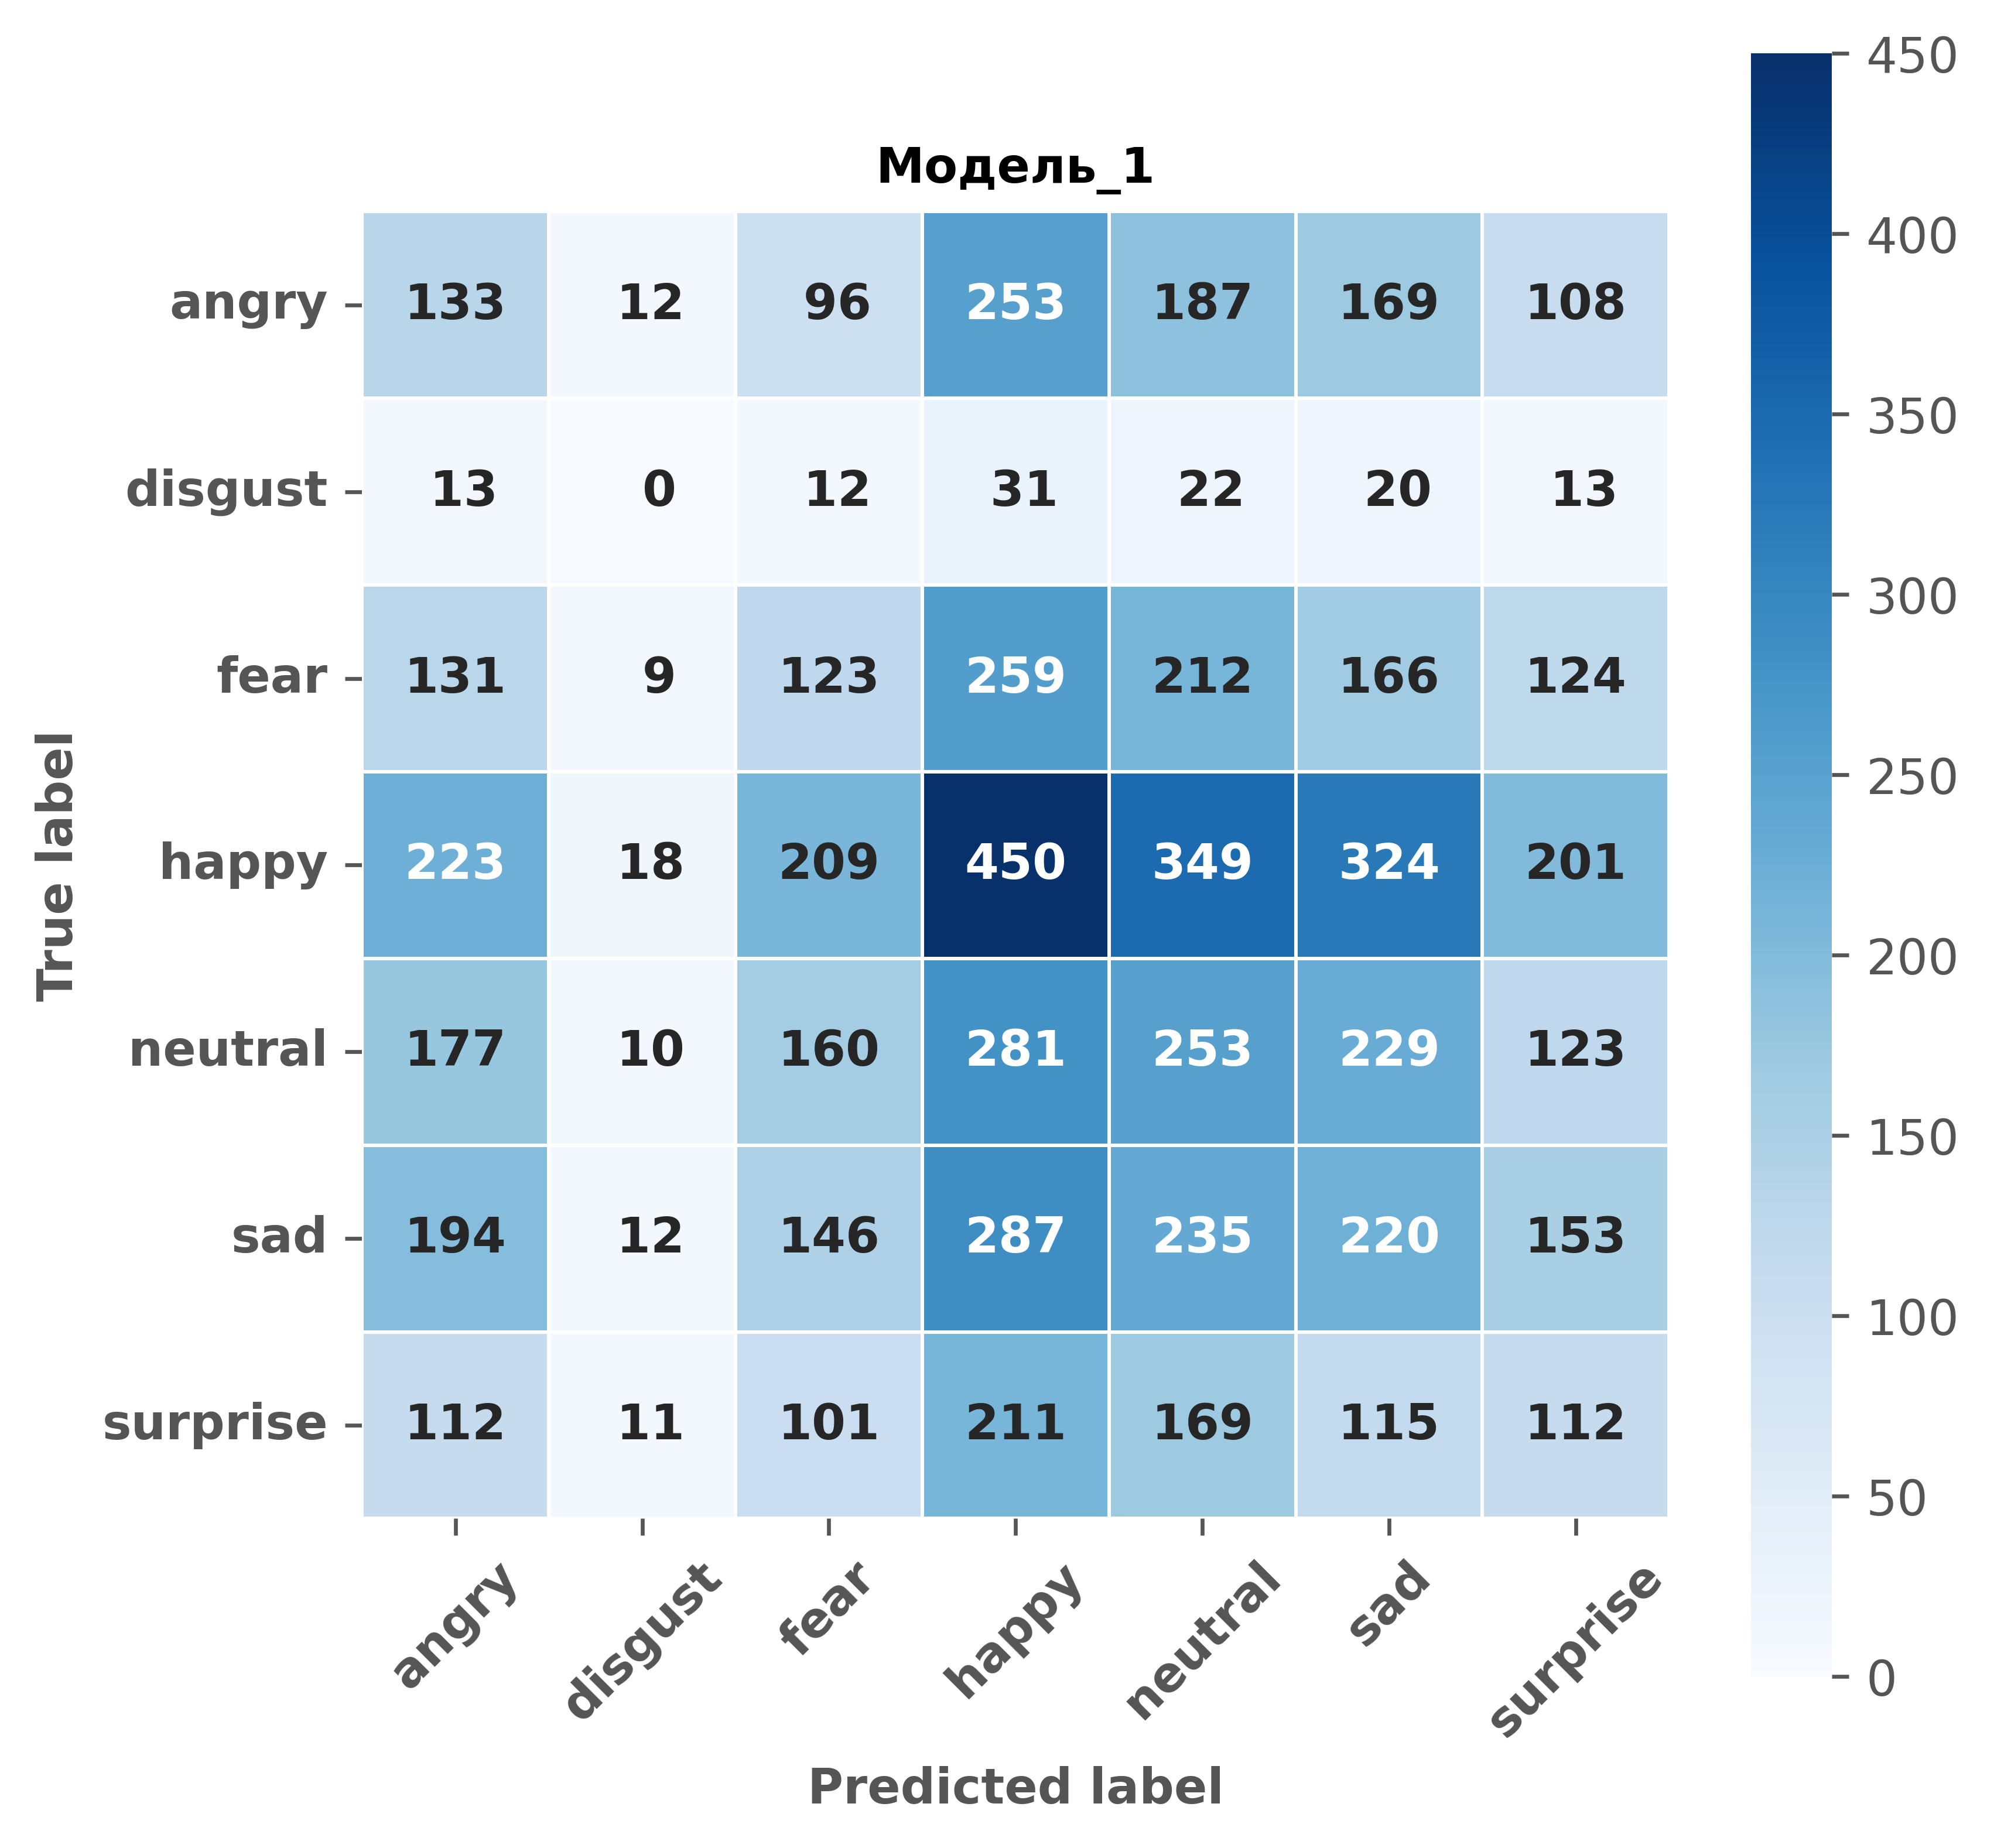

In [33]:
# array_7b = [[26484, 34, 2, 3, 57, 2, 0],
#             [59, 1200, 0, 2, 5, 0, 2],
#             [217, 2, 2613, 2, 30, 0, 0],
#             [18, 4, 0, 1882, 0, 0, 0],
#             [165, 5, 9, 0, 667, 0, 0],
#             [4, 3, 0, 0, 0, 4, 0],
#             [2, 3, 0, 0, 0, 0, 35]]


# df_cm = pd.DataFrame(array, index = [i for i in "NVRLA!E"],
#                   columns = [i for i in "NVRLA!E"])

plt.figure(figsize=(6, 6), dpi = 600)

sns.heatmap(INPUT_MATRIX, cmap='Blues', annot=True, xticklabels=EMOTIONS,
            yticklabels=EMOTIONS, annot_kws={"size": 10, "weight": "bold"},
            fmt='3g', square=True, linewidths=0.5, cbar_kws={"shrink": 1.0})

#plt.tick_params(axis='x', labelsize=12) # x font label size
#plt.tick_params(axis='y', labelsize=12) # y font label size

plt.yticks(fontweight='bold', fontsize=10, rotation=0)
plt.xticks(fontweight='bold', fontsize=10, rotation=45)

plt.title(MODEL_NAME, fontweight='bold', fontsize=10)
plt.ylabel('True label', fontweight='bold', fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', fontsize=10)

plt.savefig(f'{MODEL_NAME}.svg', bbox_inches='tight')
plt.show()